Optimal Path (A*): ['Giurgiu', 'Bucharest', 'Pitesti', 'Rimnicu Vilcea', 'Sibiu', 'Oradea']


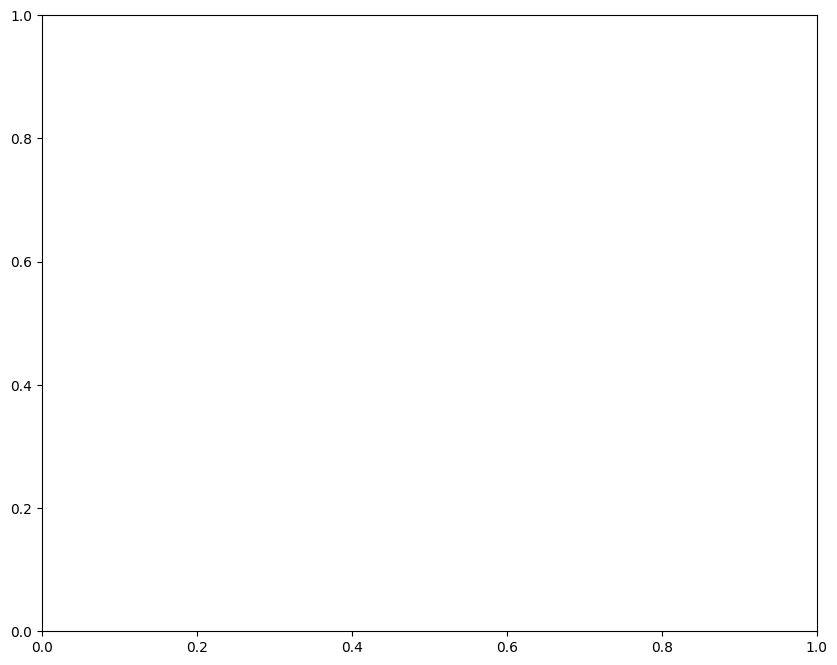

In [ ]:
# Assume, my Id is: 0112230021,So serial no is 2 and according to the serial no A* Search on Romania Map (Giurgiu → Oradea)

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Romania weighted Graph
romania_graph = {
    'Arad': [('Sibiu', 140), ('Zerind', 75), ('Timisoara', 118)],
    'Zerind': [('Arad', 75), ('Oradea', 71)],
    'Oradea': [('Zerind', 71), ('Sibiu', 151)],
    'Sibiu': [('Arad', 140), ('Oradea', 151), ('Rimnicu Vilcea', 80), ('Fagaras', 99)],
    'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
    'Rimnicu Vilcea': [('Sibiu', 80), ('Pitesti', 97), ('Craiova', 146)],
    'Pitesti': [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)],
    'Bucharest': [('Fagaras', 211), ('Giurgiu', 90), ('Urziceni', 85), ('Pitesti', 101)],
    'Giurgiu': [('Bucharest', 90)],
    'Urziceni': [('Bucharest', 85), ('Vaslui', 142), ('Hirsova', 98)],
    'Vaslui': [('Urziceni', 142), ('Iasi', 92)],
    'Iasi': [('Vaslui', 92), ('Neamt', 87)],
    'Hirsova': [('Urziceni', 98), ('Eforie', 86)],
    'Eforie': [('Hirsova', 86)],
    'Craiova': [('Rimnicu Vilcea', 146), ('Pitesti', 138), ('Drobeta', 120)],
    'Drobeta': [('Craiova', 120), ('Mehadia', 75), ('Lugoj', 70)],
    'Mehadia': [('Drobeta', 75), ('Lugoj', 70)],
    'Lugoj': [('Mehadia', 70), ('Timisoara', 111), ('Drobeta', 70)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)]
}
# last to digit of my id is 21 so (21)^2+1 Bucharest scaled to 442, heuristic values straight-line distance to Bucharest
heuristic_romania = {
    'Arad': 366 + 442,
    'Bucharest': 0 + 442,
    'Craiova': 160 + 442,
    'Drobeta': 242 + 442,
    'Eforie': 161 + 442,
    'Fagaras': 176 + 442,
    'Giurgiu': 77 + 442,
    'Hirsova': 151 + 442,
    'Iasi': 226 + 442,
    'Lugoj': 244 + 442,
    'Mehadia': 241 + 442,
    'Neamt': 234 + 442,
    'Oradea': 380 + 442,
    'Pitesti': 100 + 442,
    'Rimnicu Vilcea': 193 + 442,
    'Sibiu': 253 + 442,
    'Timisoara': 329 + 442,
    'Urziceni': 80 + 442,
    'Vaslui': 199 + 442,
    'Zerind': 374 + 442
}

def heuristic(node):
    return heuristic_romania.get(node, 0)

# A* Search
def a_star_search(graph, start, goal, heuristic):
    open_set = set([start])
    closed_set = set()
    g_scores = {start: 0}
    parents = {start: None}

    while open_set:
        current = min(open_set, key=lambda node: g_scores[node] + heuristic(node))

        if current == goal:
            path = []
            while current:
                path.append(current)
                current = parents[current]
            path.reverse()
            return path

        open_set.remove(current)
        closed_set.add(current)

        for neighbor, cost in graph.get(current, []):
            if neighbor in closed_set:
                continue
            tentative_g = g_scores[current] + cost
            if neighbor not in open_set or tentative_g < g_scores.get(neighbor, float('inf')):
                parents[neighbor] = current
                g_scores[neighbor] = tentative_g
                open_set.add(neighbor)

    return None

START_NODE = 'Giurgiu'
GOAL_NODE = 'Oradea'

path = a_star_search(romania_graph, START_NODE, GOAL_NODE, heuristic)
print("Optimal Path (A*):", path)

G = nx.Graph()
for node in romania_graph:
    for neighbor, weight in romania_graph[node]:
        G.add_edge(node, neighbor, weight=weight)

highlight_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
pos = nx.spring_layout(G, seed=50)

fig, ax = plt.subplots(figsize=(10, 8))

def update(num):
    ax.clear()
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1200, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.3, ax=ax)

    for node, (x, y) in pos.items():
        h_val = heuristic(node)
        ax.text(x, y + 0.05, f"h={h_val}", fontsize=10, ha='center', color='green')

    nx.draw_networkx_nodes(G, pos, nodelist=path[:num+1], node_color='orange', node_size=1200, ax=ax)
    if num > 0:
        nx.draw_networkx_edges(G, pos, edgelist=highlight_edges[:num], edge_color='orange', width=3, ax=ax)

    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), ax=ax, font_color='red')
    ax.set_title(f"A* Search: {START_NODE} → {GOAL_NODE} | Step {num}/{len(path)-1}")
    ax.axis('off')

anim = FuncAnimation(fig, update, frames=len(path), interval=2000, repeat=False, blit=False)
plt.show()